In [ ]:
"""
Run initial Random Forest model with a couple features

"""

In [53]:
import pandas as pd
import numpy as np
import datetime
import pickle

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score 

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# the df with features and target

with open('model_data.pickle', 'rb') as read_file:
    model_data = pickle.load(read_file)
    
model_data.head()

,company_name,period_end_date,date_bankruptcy,days,Assets,AssetsCurrent,Liabilities,LiabilitiesCurrent,NetIncomeLoss,LiabilitiesAndStockholdersEquity,StockholdersEquity,OperatingIncomeLoss,Revenues,EarningsPerShareBasic,EarningsPerShareDiluted,Division,target
0,1 800 FLOWERS COM INC,2014-06-30,NaT,NaN,267569000.0,91818000.0,81451000.0,74307000.0,NaN,267569000.0,183228000.0,23706000.0,NaN,0.24,0.23,Retail Trade,0
1,1 800 FLOWERS COM INC,2015-06-30,NaT,NaN,497073000.0,155095000.0,286817000.0,123607000.0,NaN,497073000.0,208449000.0,37617000.0,NaN,0.31,0.30,Retail Trade,0
2,1 800 FLOWERS COM INC,2016-06-30,NaT,NaN,506514000.0,166659000.0,263928000.0,120861000.0,NaN,506514000.0,242586000.0,43282000.0,NaN,0.57,0.55,Retail Trade,0
3,1 800 FLOWERS COM INC,2017-06-30,NaT,NaN,552470000.0,257402000.0,270231000.0,125175000.0,NaN,552470000.0,NaN,46359000.0,1.193625e+09,0.68,0.65,Retail Trade,0
4,1 800 FLOWERS COM INC,2018-06-30,NaT,NaN,570889000.0,273021000.0,255985000.0,124799000.0,40791000.0,570889000.0,314904000.0,41048000.0,NaN,0.63,0.61,Retail Trade,0


In [57]:
## RF will not accept NaNs
## drop NANs for intial baseline model with only a couple numeric features

model_subset = model_data[['Assets', 'Liabilities', 'target']]
model_subset.head(2)

,Assets,Liabilities,target
0,267569000.0,81451000.0,0
1,497073000.0,286817000.0,0


In [58]:
model_subset.shape

(20493, 3)

In [59]:
model_ready = model_subset.dropna()

In [60]:
model_ready.shape

(16170, 3)

In [61]:
# RFM will not process with large numbers
# put assets and liabilities in millions
model_ready['Assets_MM'] = model_ready['Assets'] / 1e6
model_ready['Libilities_MM'] = model_ready['Liabilities'] / 1e6

<ipython-input-61-b75c6baf067d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_ready['Assets_MM'] = model_ready['Assets'] / 1e6
<ipython-input-61-b75c6baf067d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_ready['Libilities_MM'] = model_ready['Liabilities'] / 1e6


In [62]:
model_ready.head()


,Assets,Liabilities,target,Assets_MM,Libilities_MM
0,267569000.0,81451000.0,0,267.569,81.451
1,497073000.0,286817000.0,0,497.073,286.817
2,506514000.0,263928000.0,0,506.514,263.928
3,552470000.0,270231000.0,0,552.470,270.231
4,570889000.0,255985000.0,0,570.889,255.985


In [63]:
model_ready.dropna(inplace=True)


<ipython-input-63-8a291e6b7bea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_ready.dropna(inplace=True)


In [64]:
X = model_ready[['Assets_MM', 'Libilities_MM']]

y = model_ready['target']

In [65]:
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.3, random_state=42)


In [66]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(xtrain, ytrain)


RandomForestClassifier()

In [67]:
randomforest.score(xval, yval)

0.9971139971139971

In [ ]:
# with True Positives so low, will not be looking at model accuracy
# a dummy classifier would have high accuracy

In [68]:
# Print confusion matrix for inital Random Forest model
rf_confusion = confusion_matrix(yval, randomforest.predict(xval))


In [69]:
rf_confusion

array([[4837,    1],
       [  13,    0]])

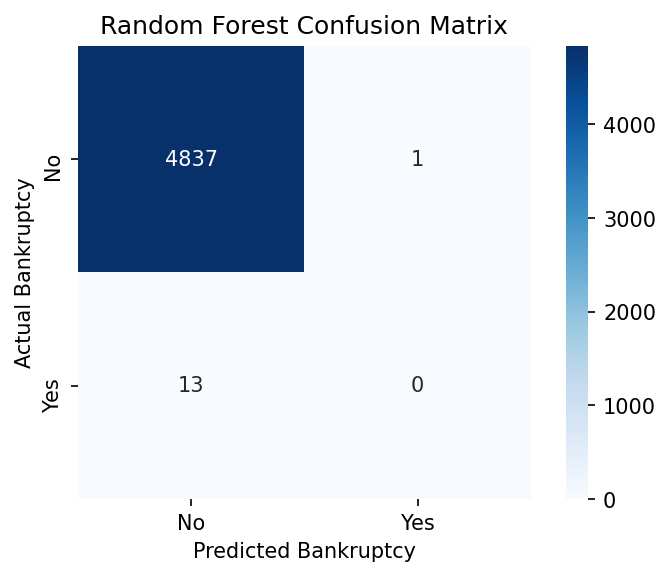

In [70]:
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt="d",
           xticklabels=['No', 'Yes'],
           yticklabels=['No', 'Yes'])

plt.xlabel('Predicted Bankruptcy')
plt.ylabel('Actual Bankruptcy')
plt.title('Random Forest Confusion Matrix');